## Diabetes Analysis and Visualization Project


For this project we will be analyzing some diabetes data from [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset). The data contains the following fields:

* Pregnancies : To express the Number of pregnancies
* Glucose: To express the Glucose level in blood
* BloodPressure: To express the Blood pressure measurement
* SkinThickness: To express the thickness of the skin
* Insulin: To express the Insulin level in blood
* BMI: To express the Body mass index
* DiabetesPedigreeFunction: To express the Diabetes percentage depending on Pedigree (Ex: Family history,...)
* Age: To express the age
* Outcome: To express the final result 1 is Yes and 0 is No

Let's go!
___

## Preparing data

**Import required libraries for Data Analysis and Visualization**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

**Import csv file as a dataframe call data_DB**

In [2]:
data_DB = pd.read_csv("E:\VSProject\TTNT\DataScience\diabetes.csv")
data_DB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Check info() of data_DB**

In [3]:
data_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Take closer look into dataset**

In [4]:
# Notice that the dataset does not have null values 
data_DB.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# In fact, some features (such as Glucose, Insulin,...) can not be 0
# However, there are so many 0 value in this dataset
# Hence, there could be have missing value converted to 0 

data_DB[data_DB == 0].count()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Data preprocessing**

In [6]:
# Replace all 0 value by NaN
data_DB["Glucose"] = data_DB["Glucose"].replace(0,np.nan)
data_DB["BloodPressure"] = data_DB["BloodPressure"].replace(0,np.nan)
data_DB["SkinThickness"] = data_DB["SkinThickness"].replace(0,np.nan)
data_DB["Insulin"] = data_DB["Insulin"].replace(0,np.nan)
data_DB["BMI"] = data_DB["BMI"].replace(0,np.nan)

data_DB.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
# Check null
data_DB.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
data_DB.median()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [9]:
# fill null with coresponding median of each feature
data_DB.fillna(data_DB.median(), inplace=True)
data_DB.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [10]:
# Check null
data_DB.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Analysis and Visualization

**Some important Descriptive Statistics**

In [11]:
data_DB.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

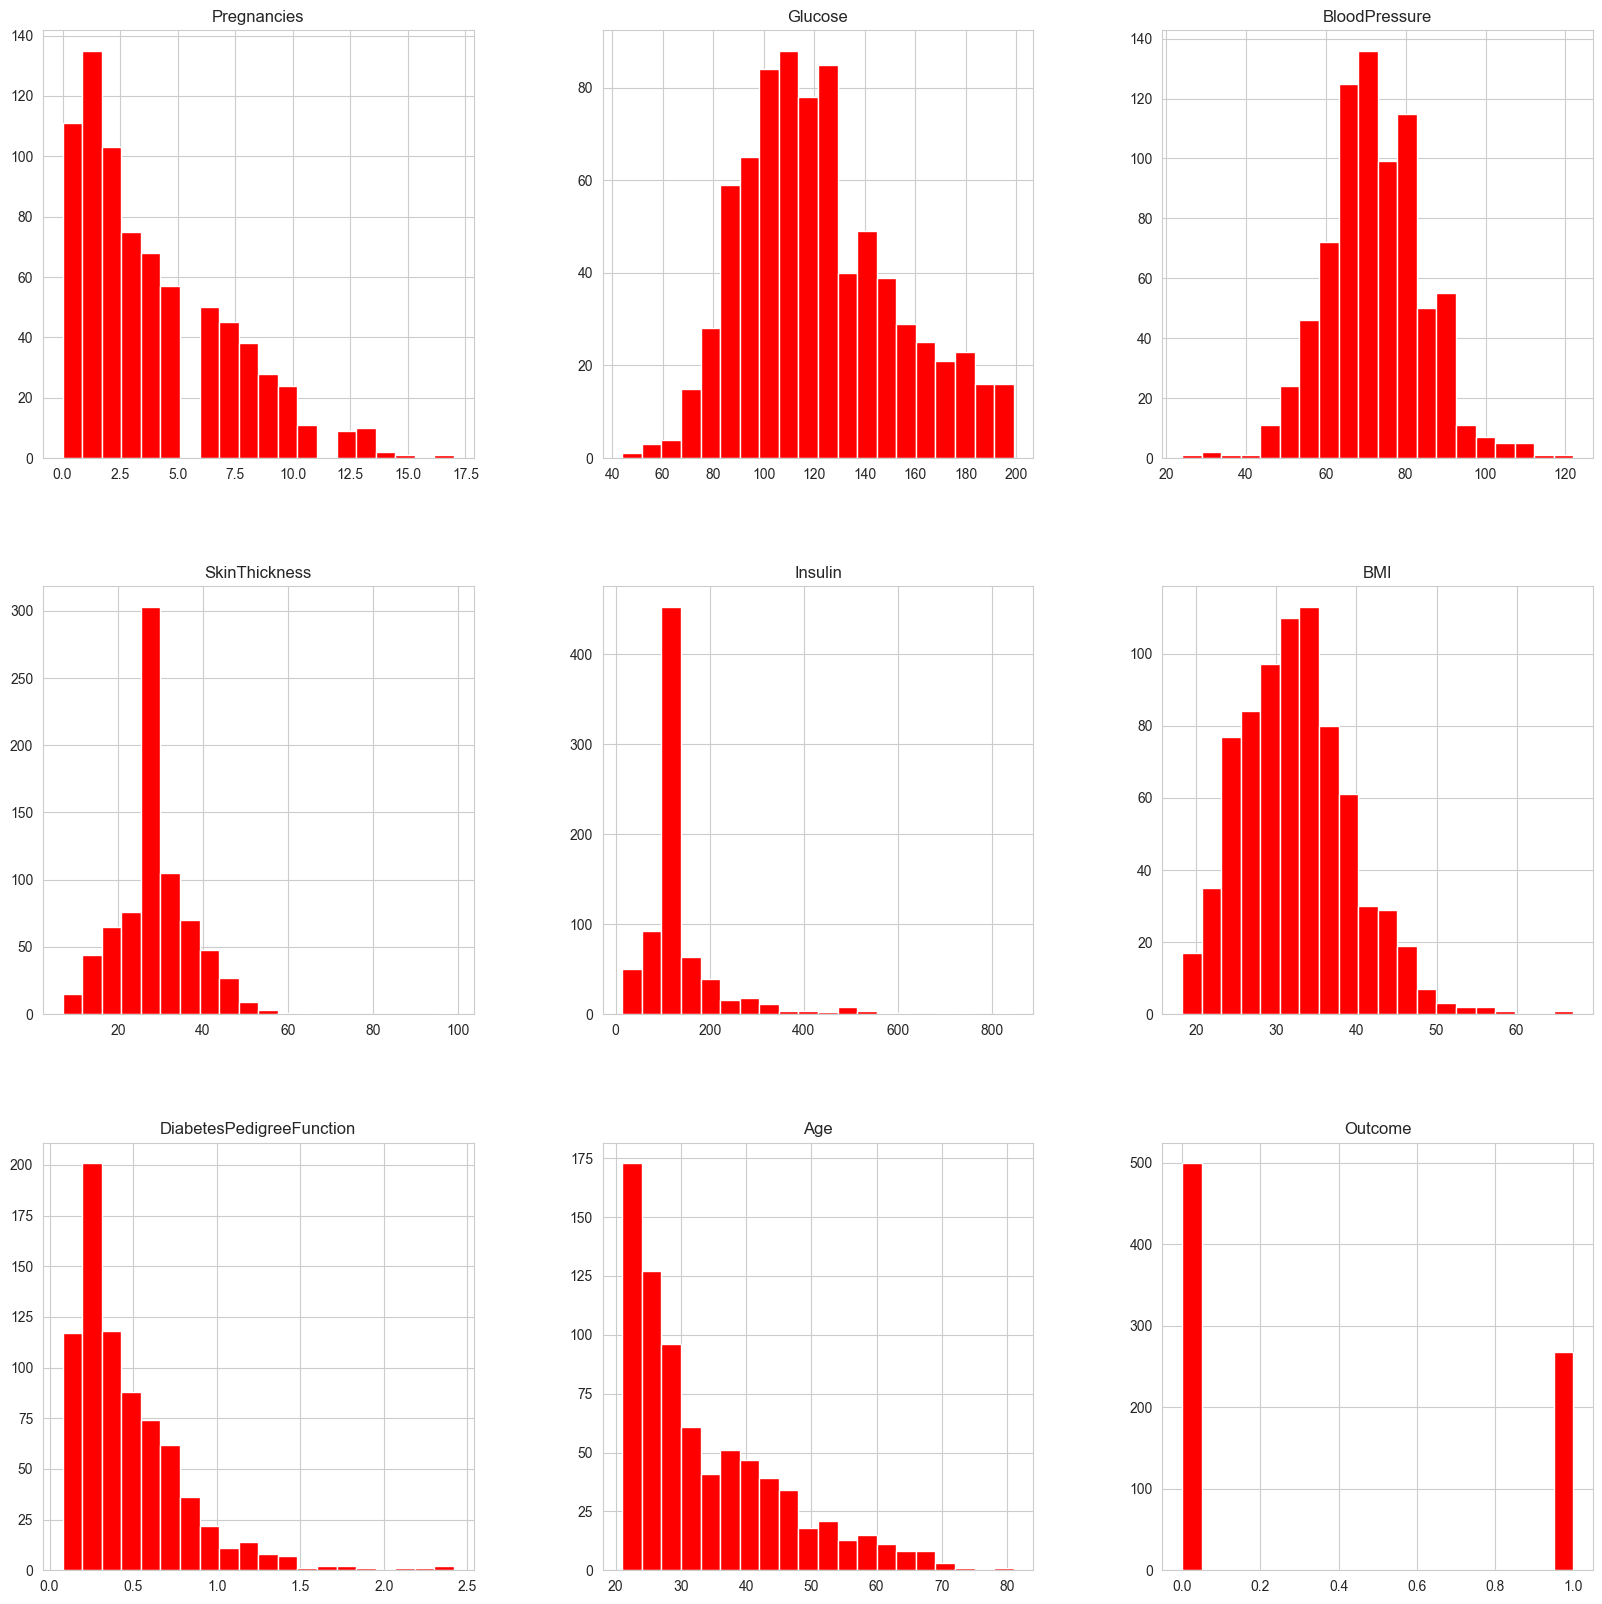

In [12]:
data_DB.hist(bins = 20, figsize = (20,20), color = 'r')


**Use seaborn countplot to show the number of people who did not or have diabetes** 

In [13]:
len(data_DB[data_DB['Outcome']==0])

500

([<matplotlib.patches.Wedge at 0x215f2331930>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'without_diabetes'),
  Text(0.5025944158780503, -0.9784676045369114, 'diabetes')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

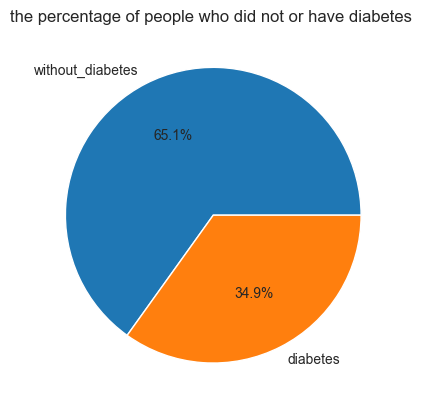

In [14]:
plt.title('the percentage of people who did not or have diabetes ')
plt.pie([len(data_DB[data_DB['Outcome']==0]), len(data_DB[data_DB['Outcome']==1])], labels=["without_diabetes", "diabetes"], autopct='%1.1f%%')
# Imbalance Outcome
# The number of people who do not have diabetes are almost twice larger than those who have diabetes

**Show relationship between age and outcome**

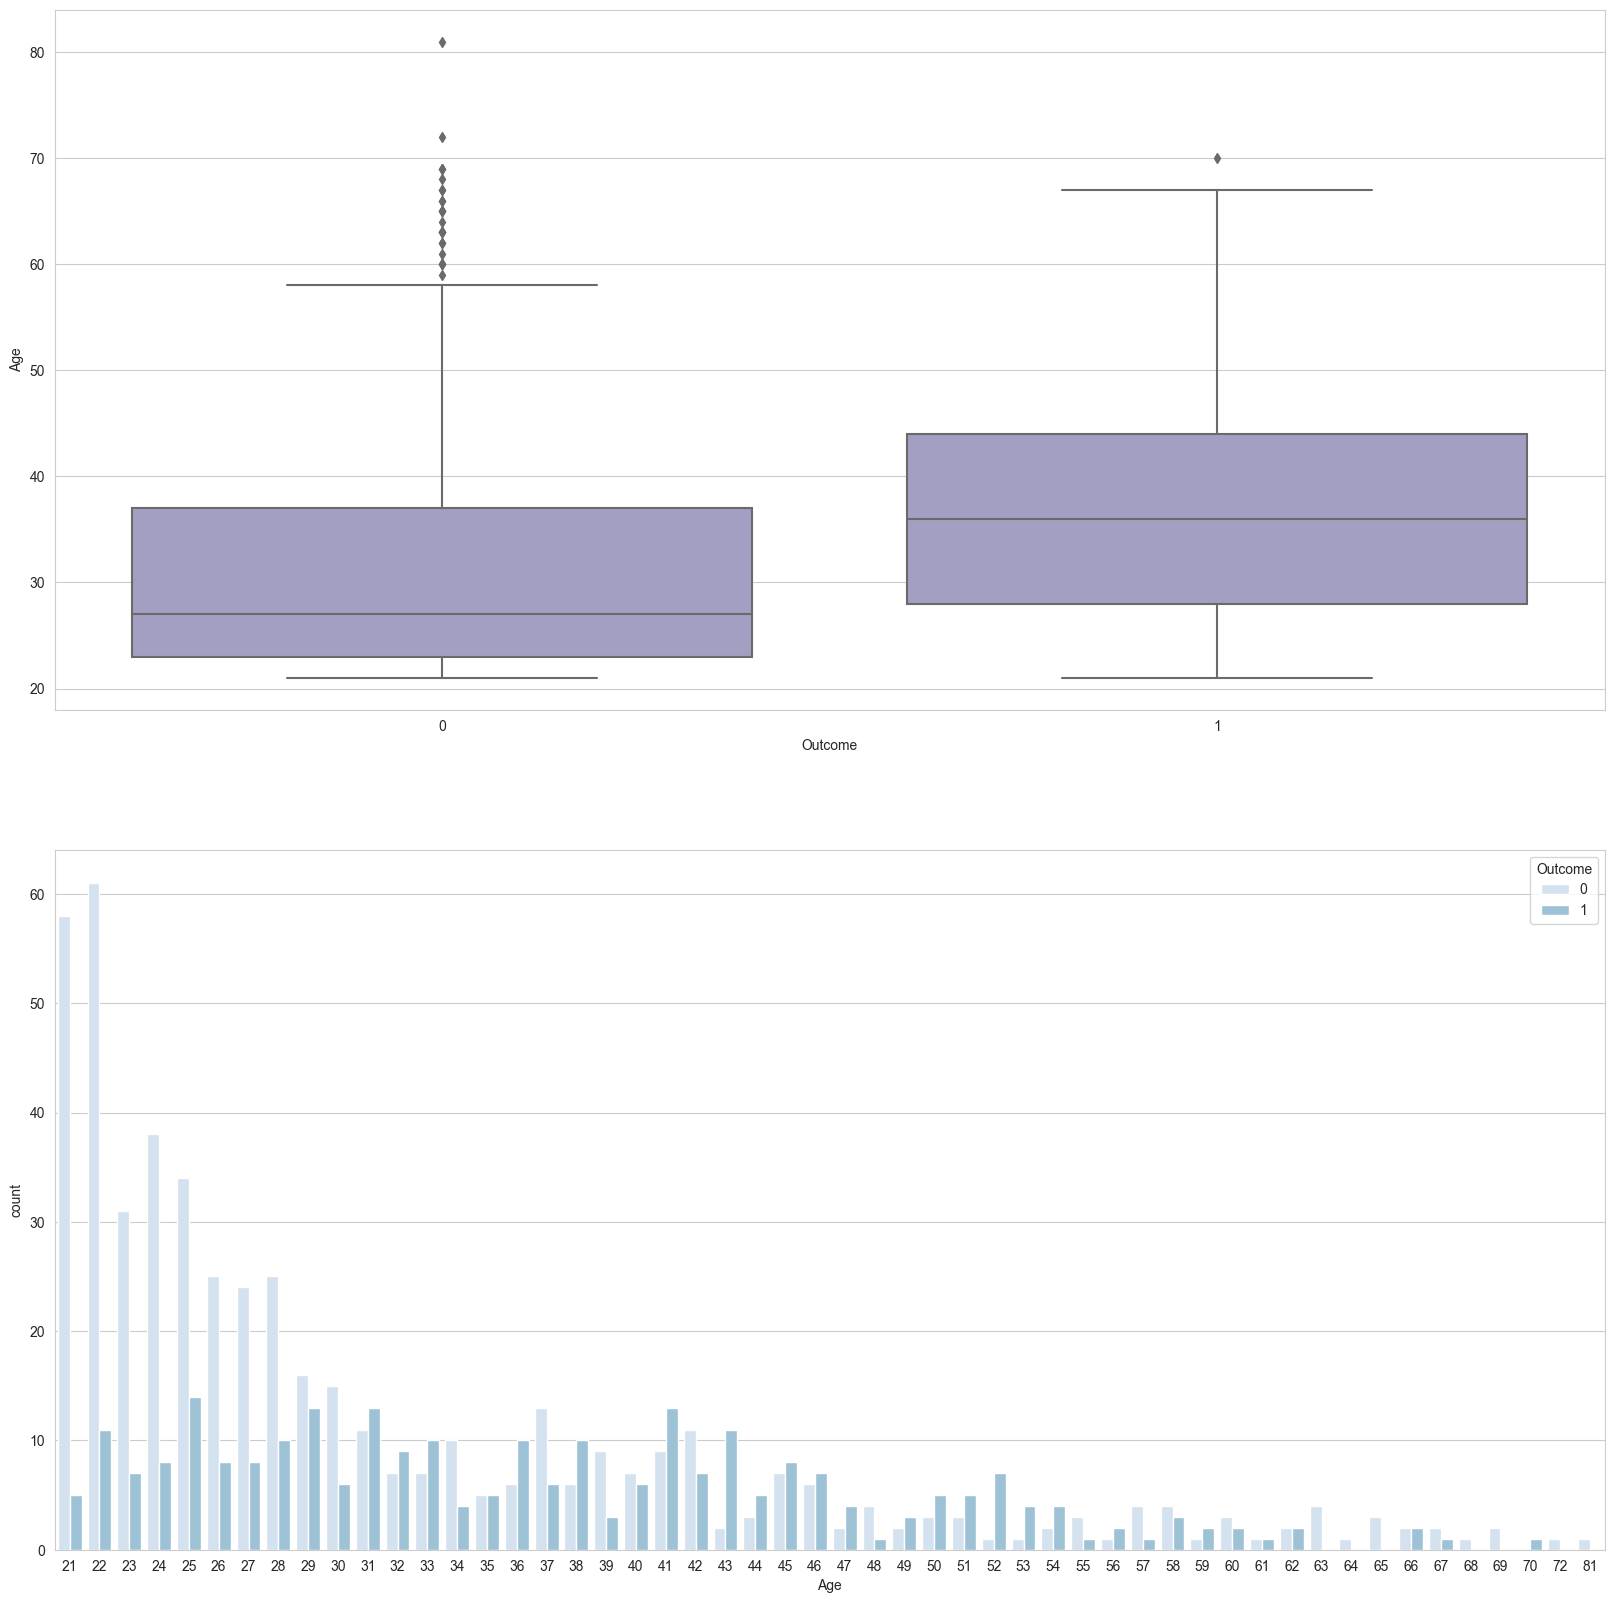

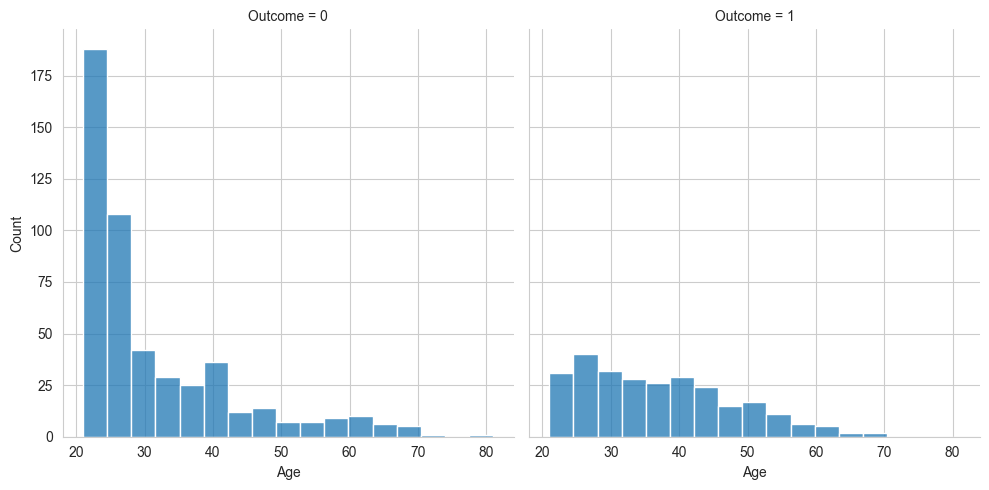

In [15]:
fig, axes = plt.subplots(2,1, figsize=(20, 20))

#Graph1
sequential_colors1 = sns.color_palette("Purples", 1)
sns.boxplot(ax=axes[0], data=data_DB, x='Outcome',y = "Age", palette = sequential_colors1)

#Graph2
sequential_colors2 = sns.color_palette("Blues", 4)
sns.countplot(ax=axes[1], data=data_DB, x='Age',hue = "Outcome", palette = sequential_colors2)

#Graph3
sns.displot(data=data_DB,x="Age", col = "Outcome")


# Old people are more likely to have diabetes than young ones

<AxesSubplot: xlabel='Outcome', ylabel='Insulin'>

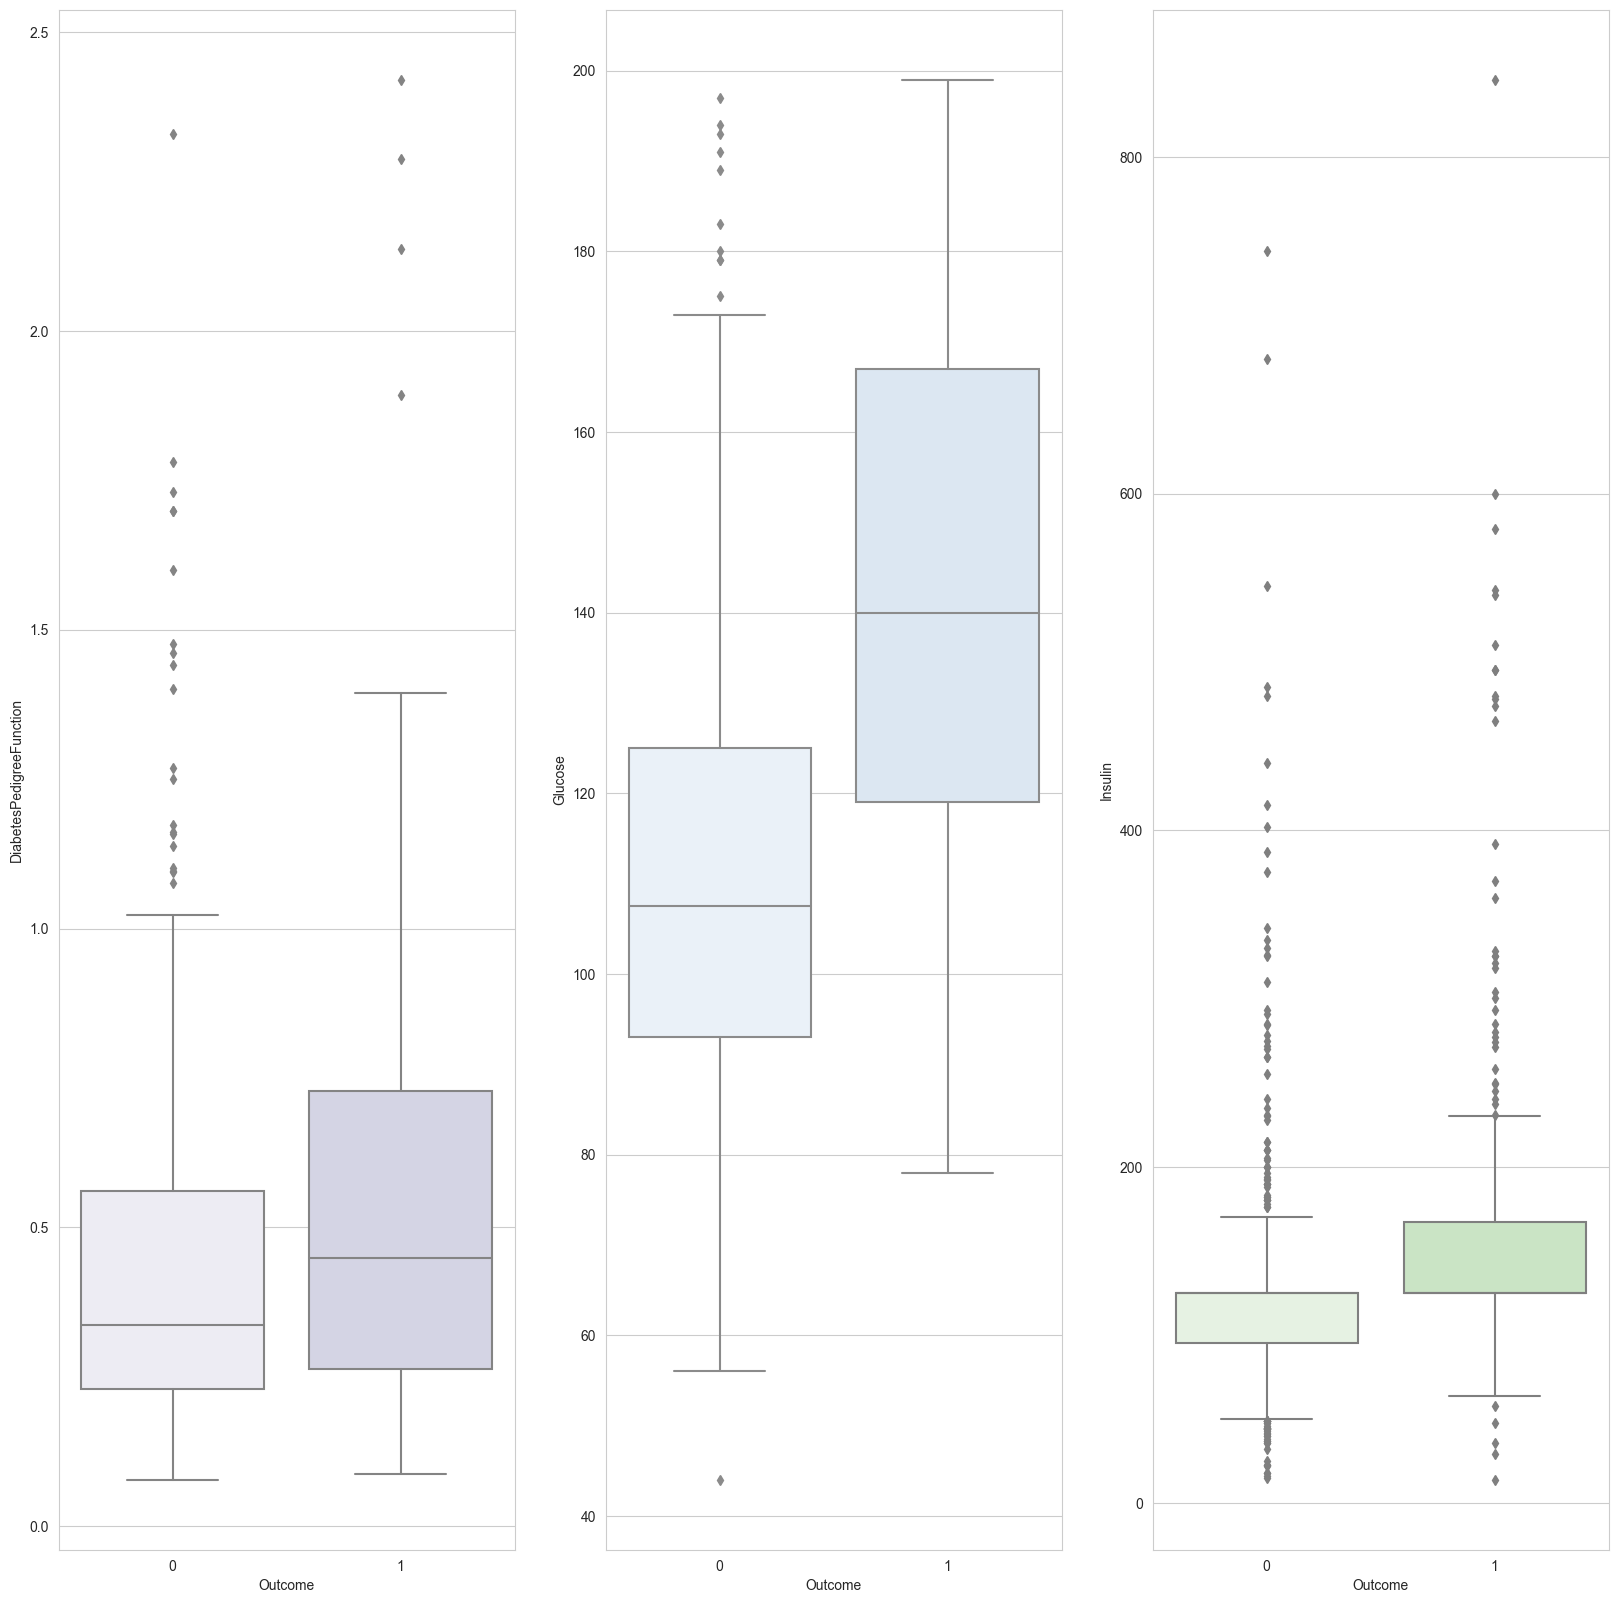

In [16]:
# sns.set_theme(style="ticks", color_codes=True)
# sns.boxplot(x="Outcome", y="Age", data=data_DB)

fig, axes = plt.subplots(1,3, figsize=(20, 20))
 
fig.suptitle("", size = "xx-large")
  
#Graph1
sequential_colors1 = sns.color_palette("Purples", 6)
sns.boxplot(ax=axes[0], data=data_DB, x='Outcome',y = "DiabetesPedigreeFunction", palette = sequential_colors1)

#Graph2
sequential_colors2 = sns.color_palette("Blues", 12)
sns.boxplot(ax=axes[1], data=data_DB, x='Outcome',y = "Glucose", palette = sequential_colors2)

#Graph3
sequential_colors3 = sns.color_palette("Greens", 7)
sns.boxplot(ax=axes[2], data=data_DB, x='Outcome', y = "Insulin", palette = sequential_colors3)

# Relationship between DiabetesPdegreeFunction, Glucose, Insulin and Outcome


**Relationship between Insulin and Glucose**

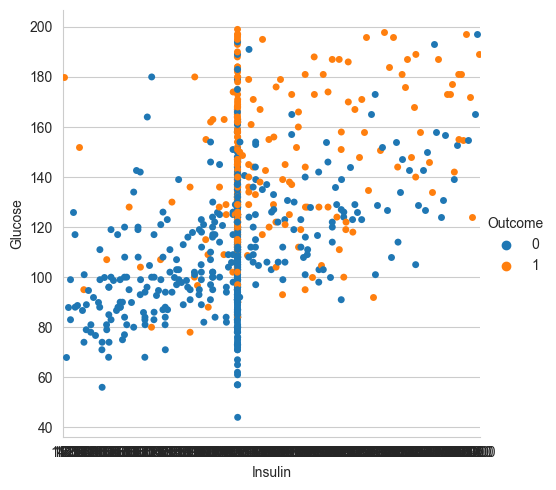

In [17]:
sns.catplot(data=data_DB, x='Insulin', y='Glucose', hue='Outcome')
# Almost people with high glucose have diabetes

**Prove Independence in some pair of features**

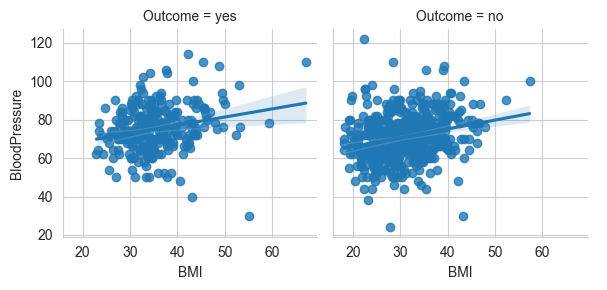

In [18]:
data_DB['Outcome']=data_DB.Outcome.replace({0: 'no', 1:'yes'})
sns.FacetGrid(data=data_DB, col='Outcome').map(sns.regplot, 'BMI', 'BloodPressure').add_legend()
plt.show()

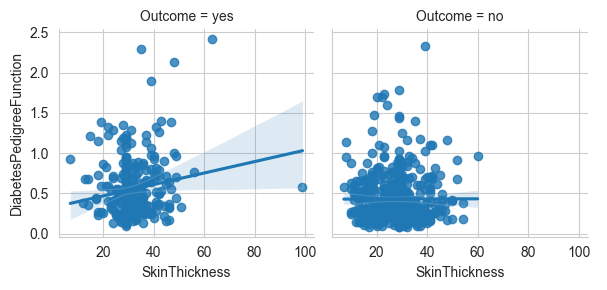

In [19]:
data_DB['Outcome']=data_DB.Outcome.replace({0: 'no', 1:'yes'})
sns.FacetGrid(data=data_DB, col='Outcome').map(sns.regplot, 'SkinThickness', 'DiabetesPedigreeFunction').add_legend()
plt.show()

**Correlation Heatmap**

C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\1973626909.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_DB.corr(), square = True, annot = True, cmap='coolwarm')


<AxesSubplot: title={'center': 'Correlation Heatmap of Diabetes Dataset'}>

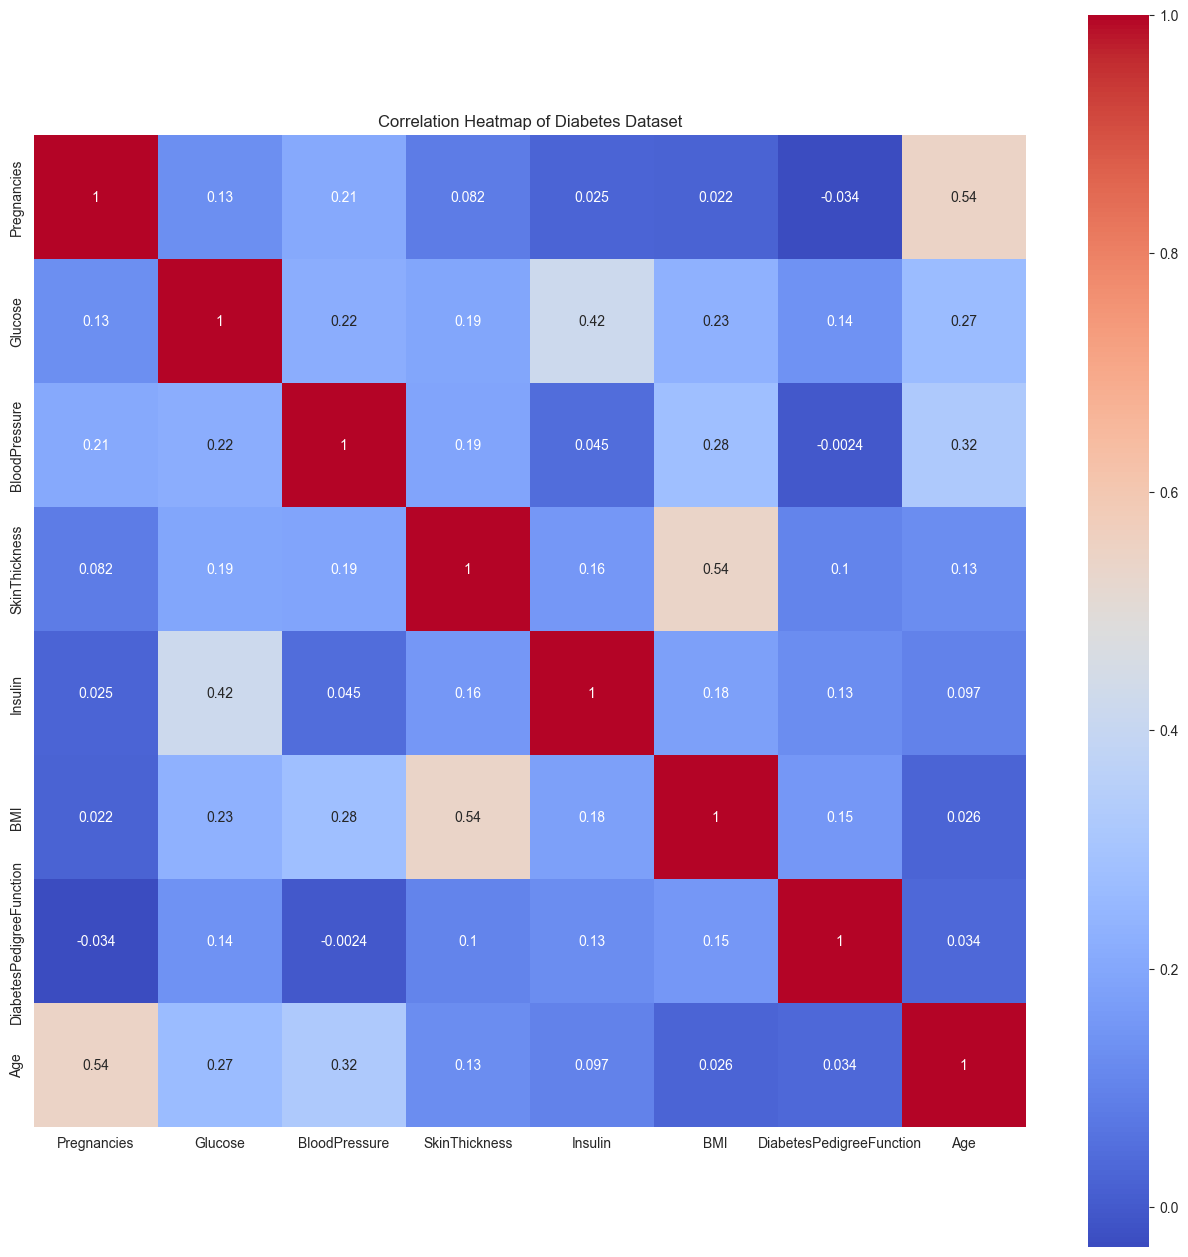

In [20]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Diabetes Dataset')
fig.set_size_inches((16,16))
sns.heatmap(data_DB.corr(), square = True, annot = True, cmap='coolwarm')

# Walkthrough above analysis, glucose has a correlative, decision role in decide if a person have diabetes or not
# Depend on glucose and its correlation with another features to decide another feature affect on diabetes
# Another relationship can be seen in matrix.